In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')







In [3]:
df = pd.read_csv("stud.csv")

In [4]:

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop_duplicates().reset_index(drop=True)


In [9]:
df = df.drop_duplicates()


In [11]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [18]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [20]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


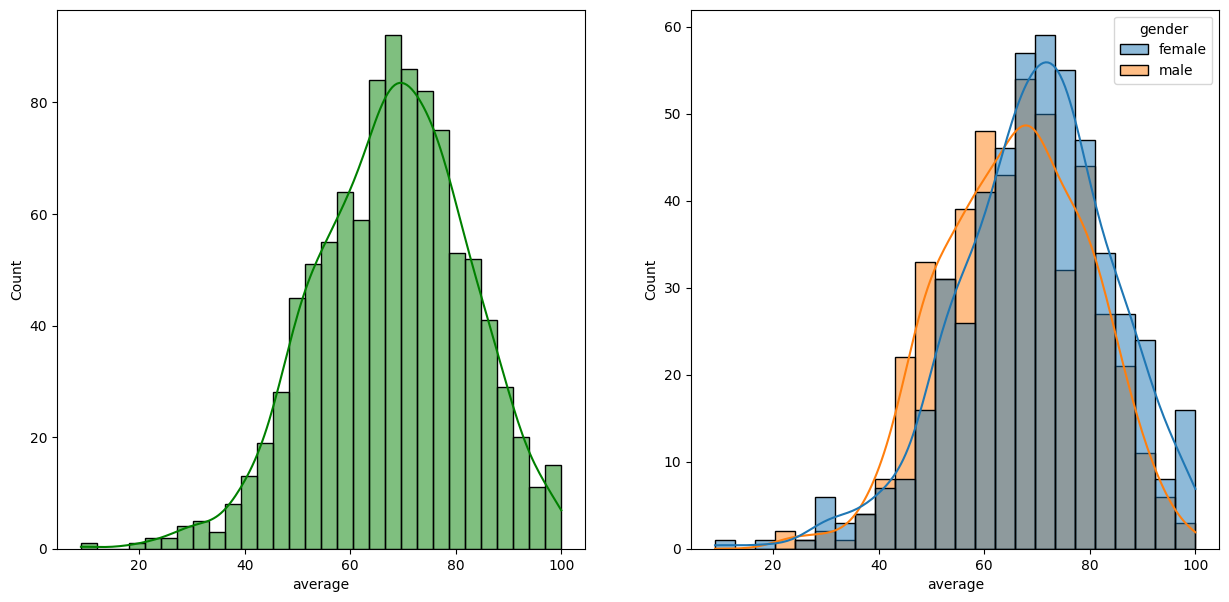

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

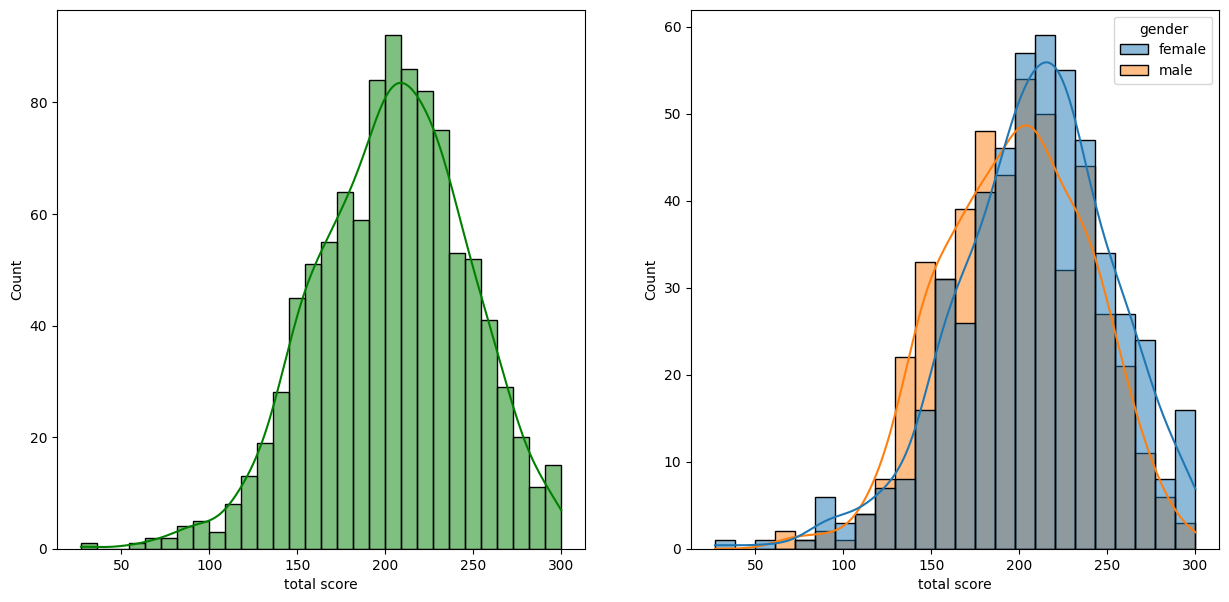

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

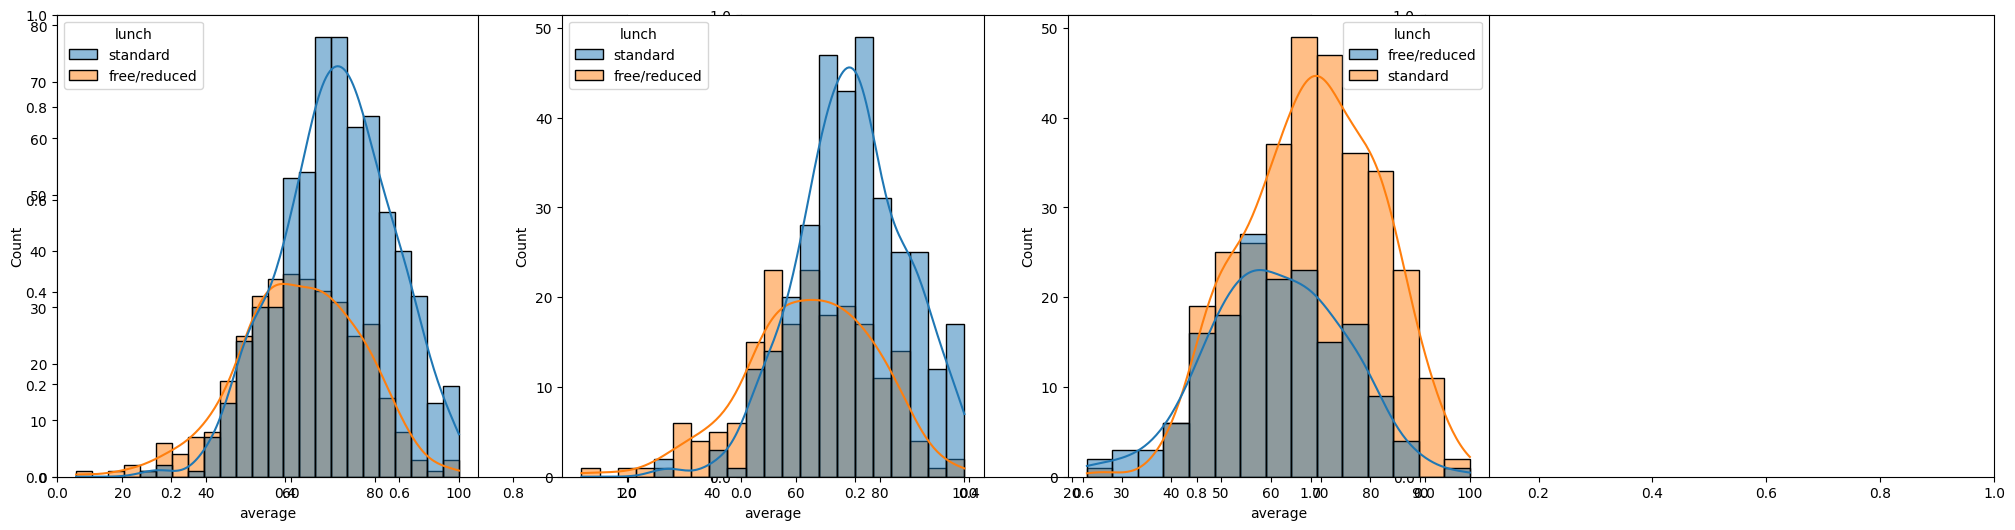

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

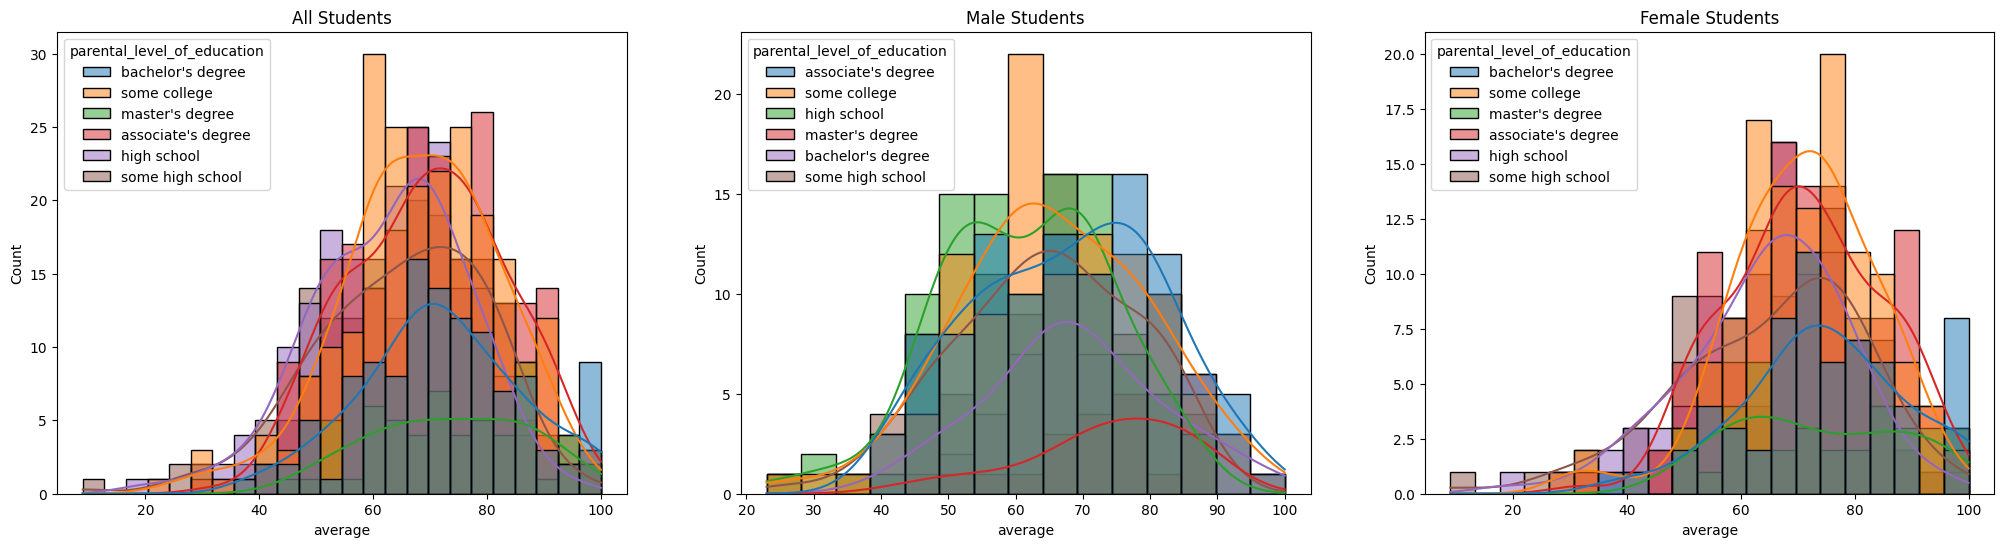

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,6))

# 1st subplot — All students
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title("All Students")

# 2nd subplot — Male students
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Male Students")

# 3rd subplot — Female students
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Female Students")

plt.show()


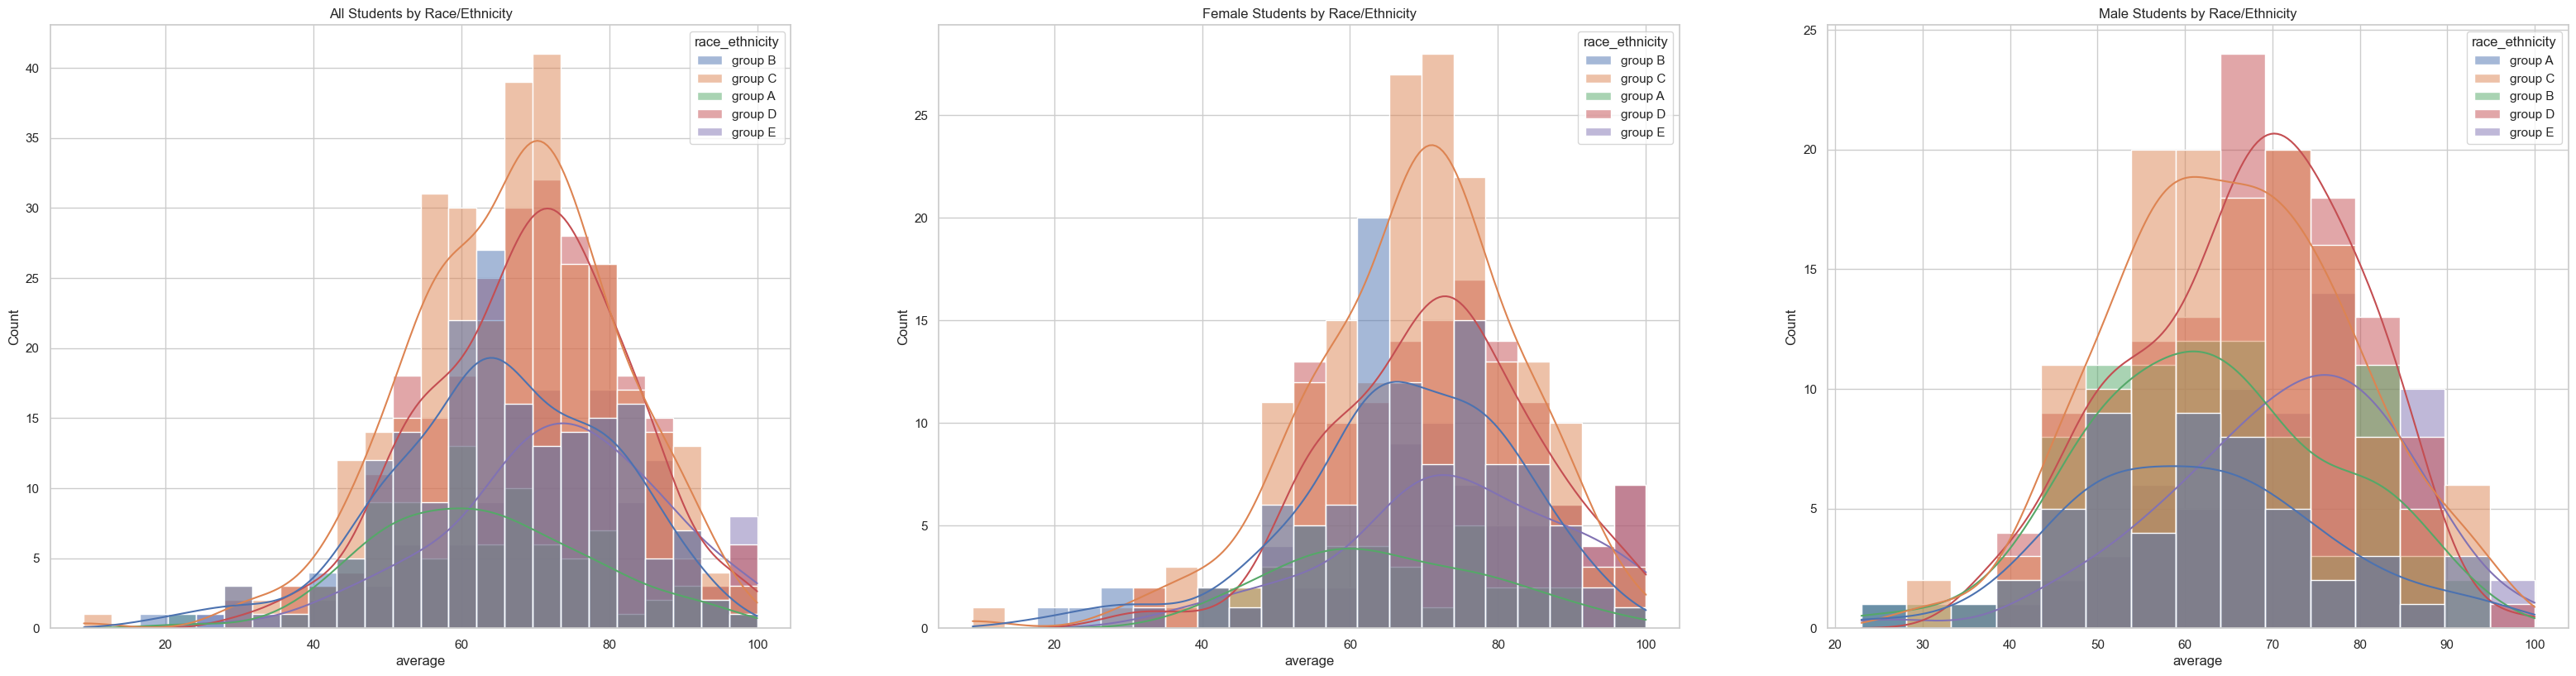

In [54]:


# Plot
plt.figure(figsize=(35,9))

# 1️⃣ All students
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', kde=True, hue=race_col)
plt.title("All Students by Race/Ethnicity")

# 2️⃣ Female students
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue=race_col)
plt.title("Female Students by Race/Ethnicity")

# 3️⃣ Male students
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue=race_col)
plt.title("Male Students by Race/Ethnicity")

plt.show()


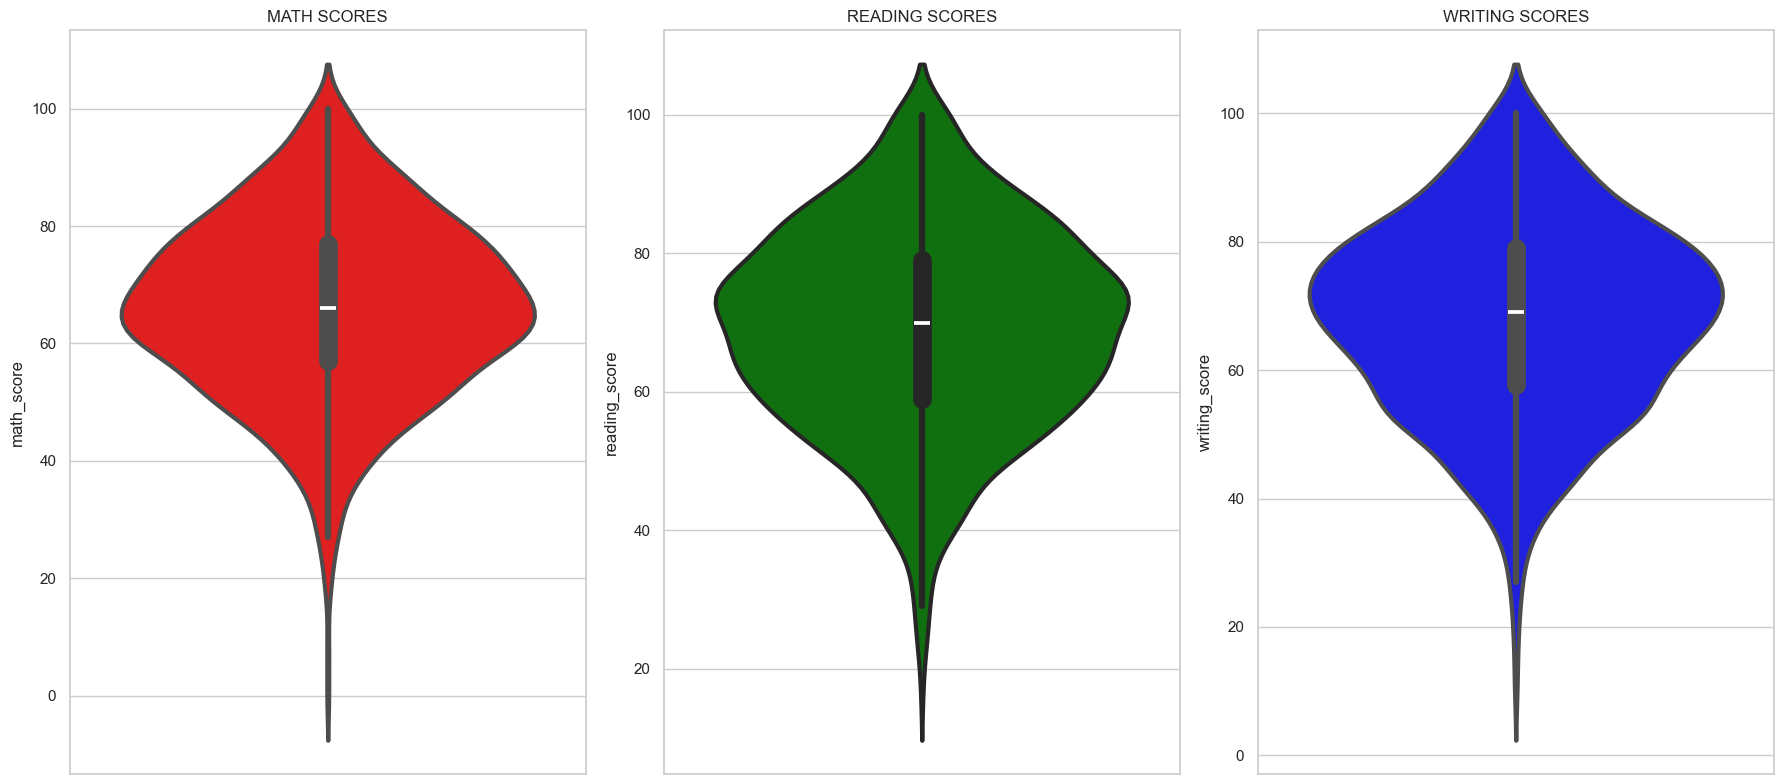

In [55]:
plt.figure(figsize=(18,8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y=math_col, data=df, color='red', linewidth=3)

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y=reading_col, data=df, color='green', linewidth=3)

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y=writing_col, data=df, color='blue', linewidth=3)

plt.tight_layout()
plt.show()


In [28]:
print(df.columns.tolist())  #Before plotting, always check:


['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total score', 'average']


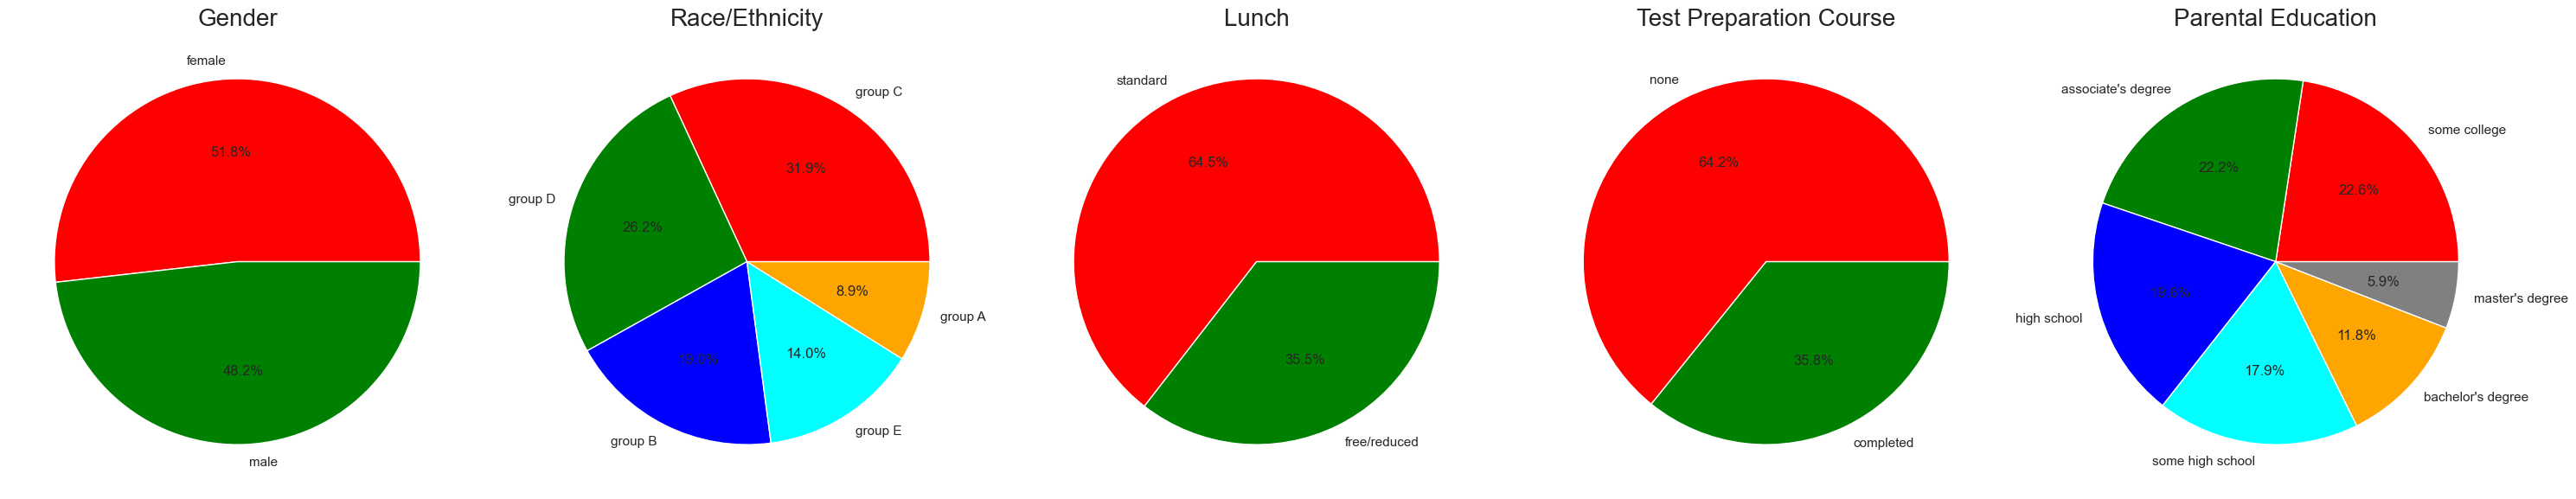

In [60]:
# 1️⃣ Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# 2️⃣ Race/Ethnicity
plt.subplot(1, 5, 2)
size = df[race_col].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# 3️⃣ Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# 4️⃣ Test Preparation
plt.subplot(1, 5, 4)
size = df[test_col].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis('off')

# 5️⃣ Parental Education
plt.subplot(1, 5, 5)
size = df[parent_col].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=colors[:len(size)], labels=labels, autopct='%1.1f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


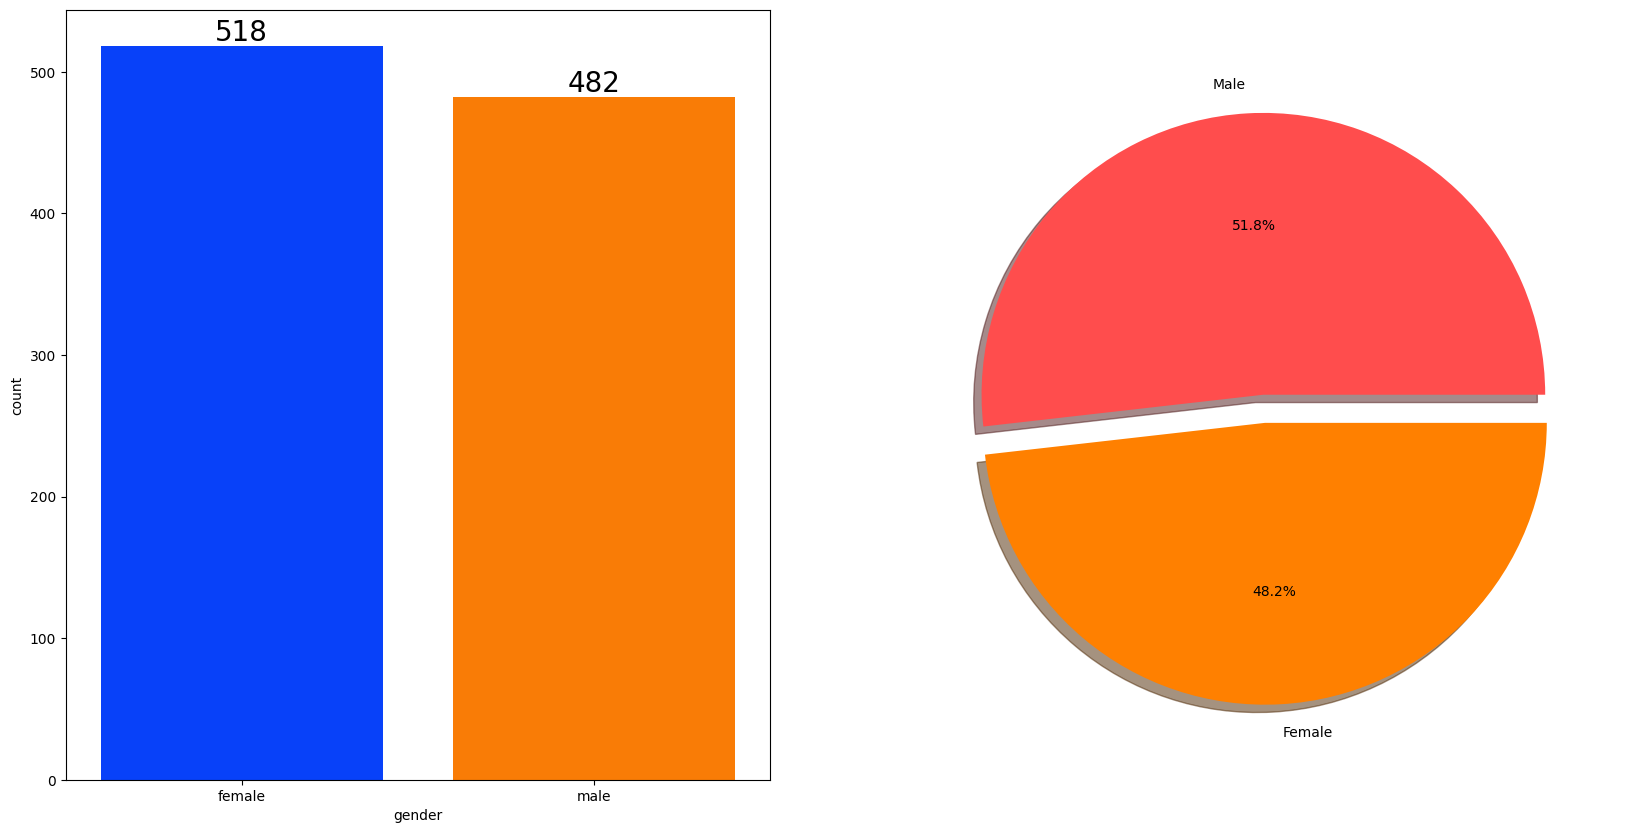

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [31]:
#UNIVARIATE ANALYSIS
numeric_cols = df.select_dtypes(include='number').columns
gender_group = df.groupby('gender')[numeric_cols].mean()
print(gender_group)


        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


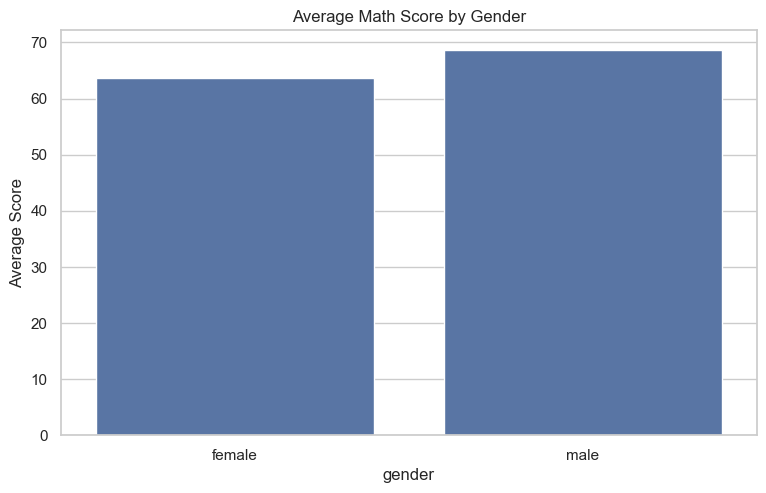

In [61]:

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='gender', y=math_col, estimator='mean', errorbar=None)
plt.title("Average Math Score by Gender")
plt.ylabel("Average Score")
plt.show()


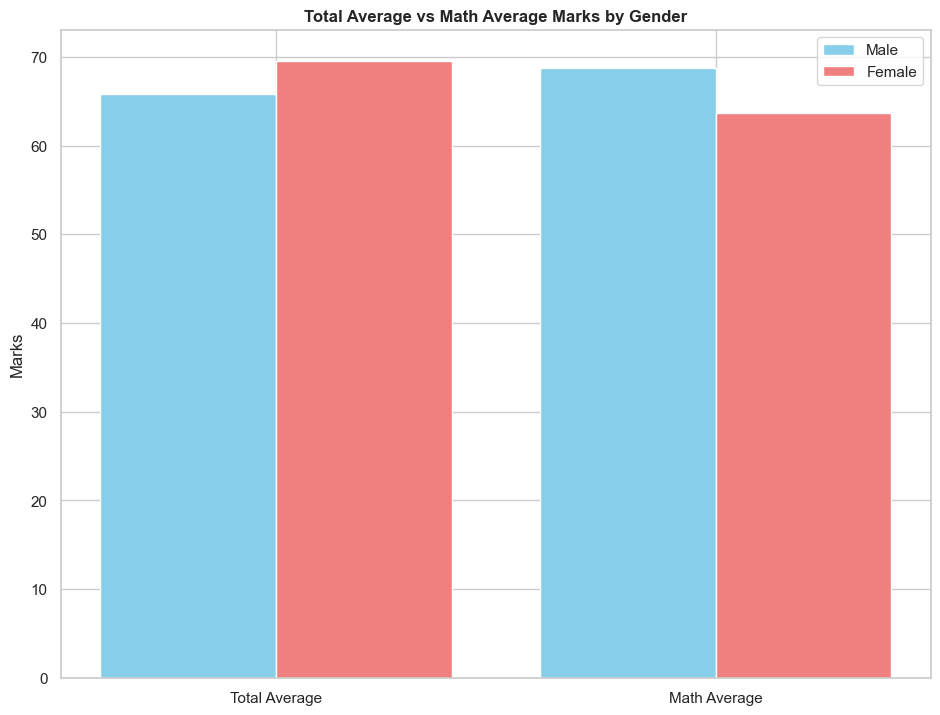

In [62]:

# Get female and male scores (use .loc for clarity)
female_scores = [gender_group.loc['female', avg_col], gender_group.loc['female', math_col]]
male_scores   = [gender_group.loc['male', avg_col], gender_group.loc['male', math_col]]

# X-axis labels
X = ['Total Average', 'Math Average']
X_axis = np.arange(len(X))

plt.figure(figsize=(10, 8))
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='skyblue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='lightcoral')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks by Gender", fontweight='bold')
plt.legend()
plt.show()


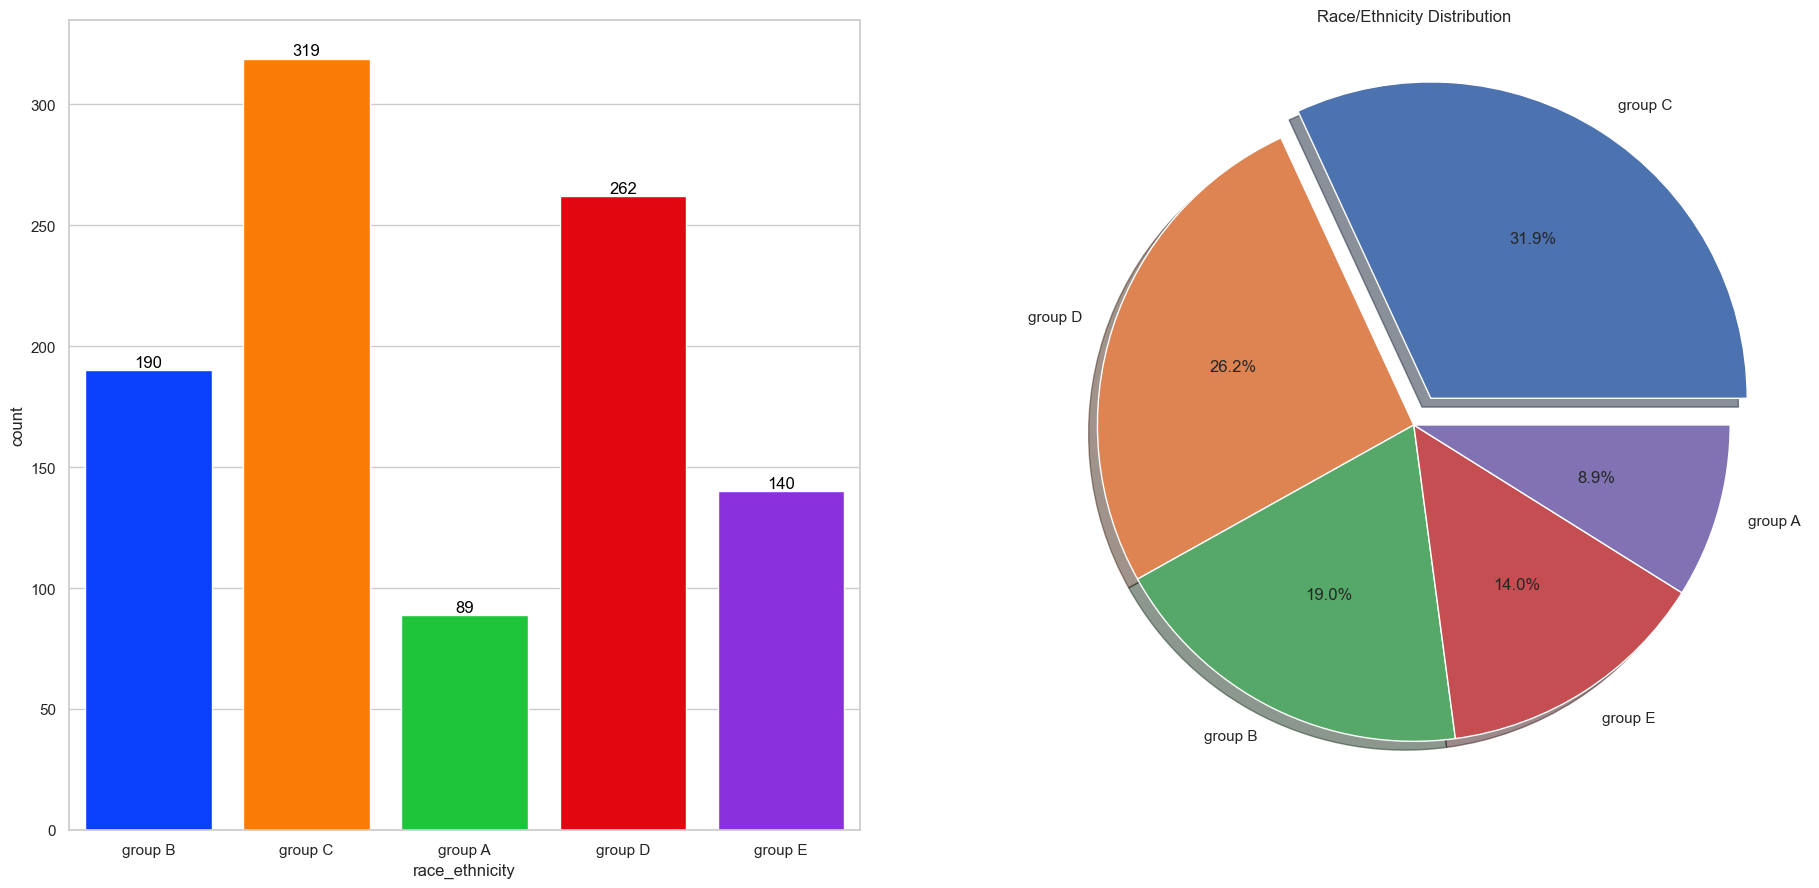

In [67]:

f, ax = plt.subplots(1, 2, figsize=(20,10))

# Countplot
sns.countplot(x=df[race_col], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# Pie chart
ax[1] = plt.subplot(1, 2, 2)
ax[1].pie(
    x=df[race_col].value_counts(),
    labels=df[race_col].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True
)
ax[1].set_title("Race/Ethnicity Distribution")

plt.show()


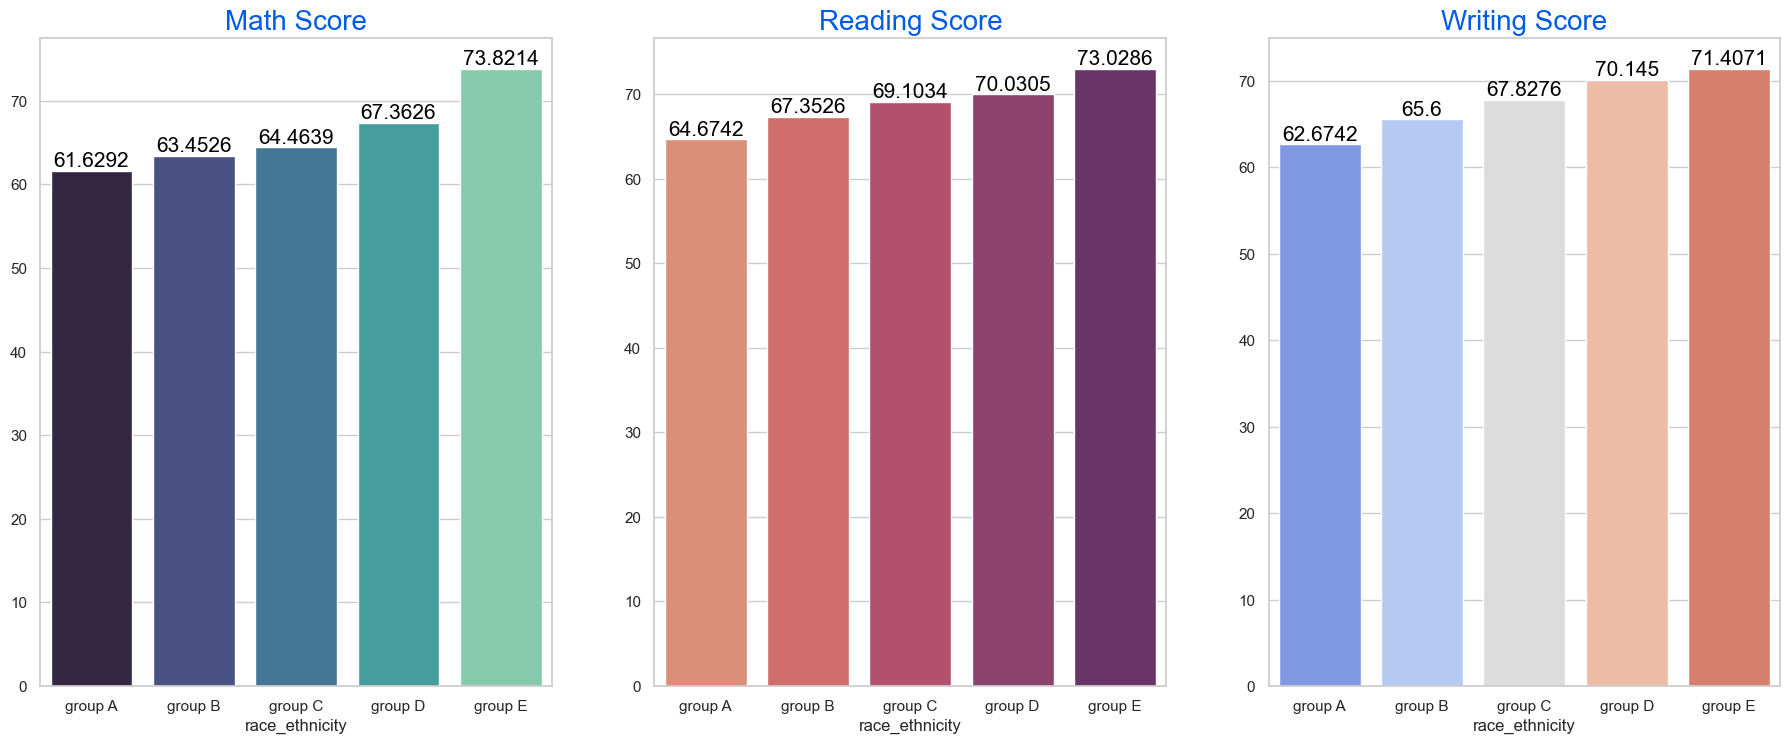

In [68]:
#BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )


f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math score
sns.barplot(
    x=Group_data2[math_col].mean().index,
    y=Group_data2[math_col].mean().values,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading score
sns.barplot(
    x=Group_data2[reading_col].mean().index,
    y=Group_data2[reading_col].mean().values,
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing score
sns.barplot(
    x=Group_data2[writing_col].mean().index,
    y=Group_data2[writing_col].mean().values,
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()


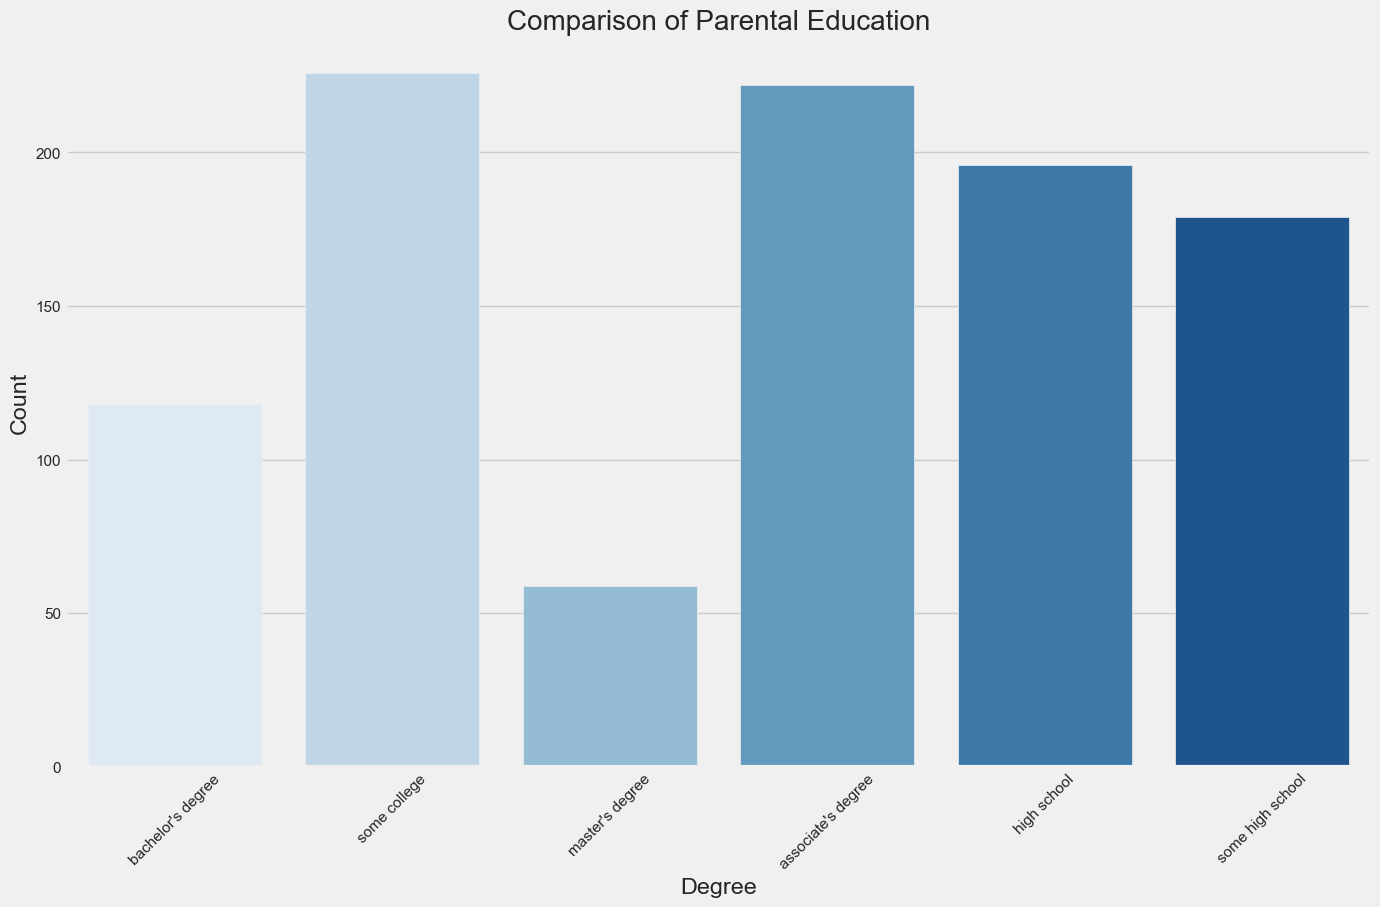

In [70]:
#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )
# Check the exact column names


plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(x=df[parent_col], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


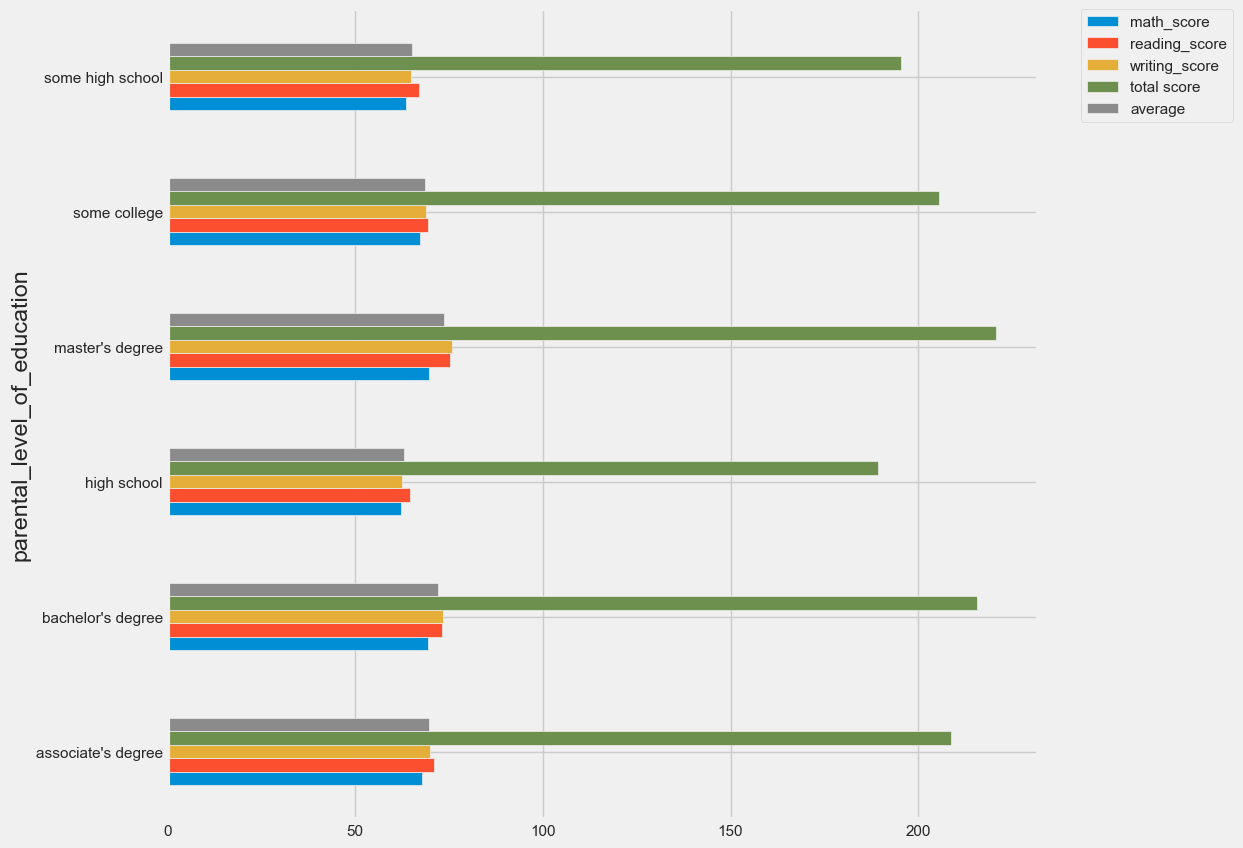

In [72]:
#BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )
# Step 1: Group the data by parental level of education
grouped = df.groupby('parental_level_of_education')

# Step 2: Select only the numeric columns and calculate the mean
numeric_cols = df.select_dtypes(include=['number']).columns
grouped[numeric_cols].mean().plot(kind='barh', figsize=(10, 10))

# Step 3: Display the legend and show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Index(['math_score', 'reading_score', 'writing_score', 'total score',
       'average'],
      dtype='object')


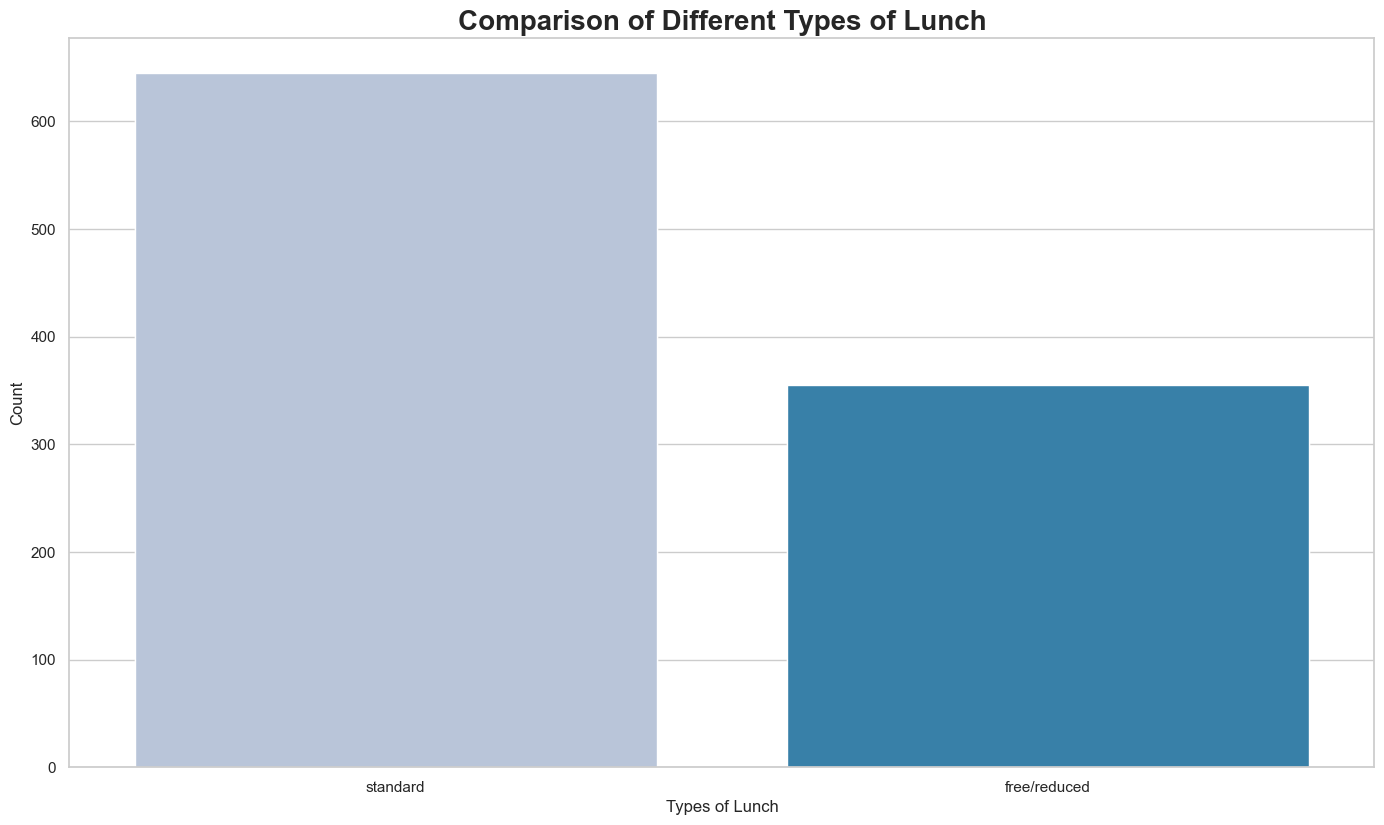

In [73]:
#UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

sns.set_theme(style="whitegrid")  # ✅ modern replacement for plt.style.use('seaborn')
plt.figure(figsize=(15, 9))
sns.countplot(x='lunch', data=df, palette='PuBu')

sns.countplot(x='lunch', data=df, palette='PuBu')
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()


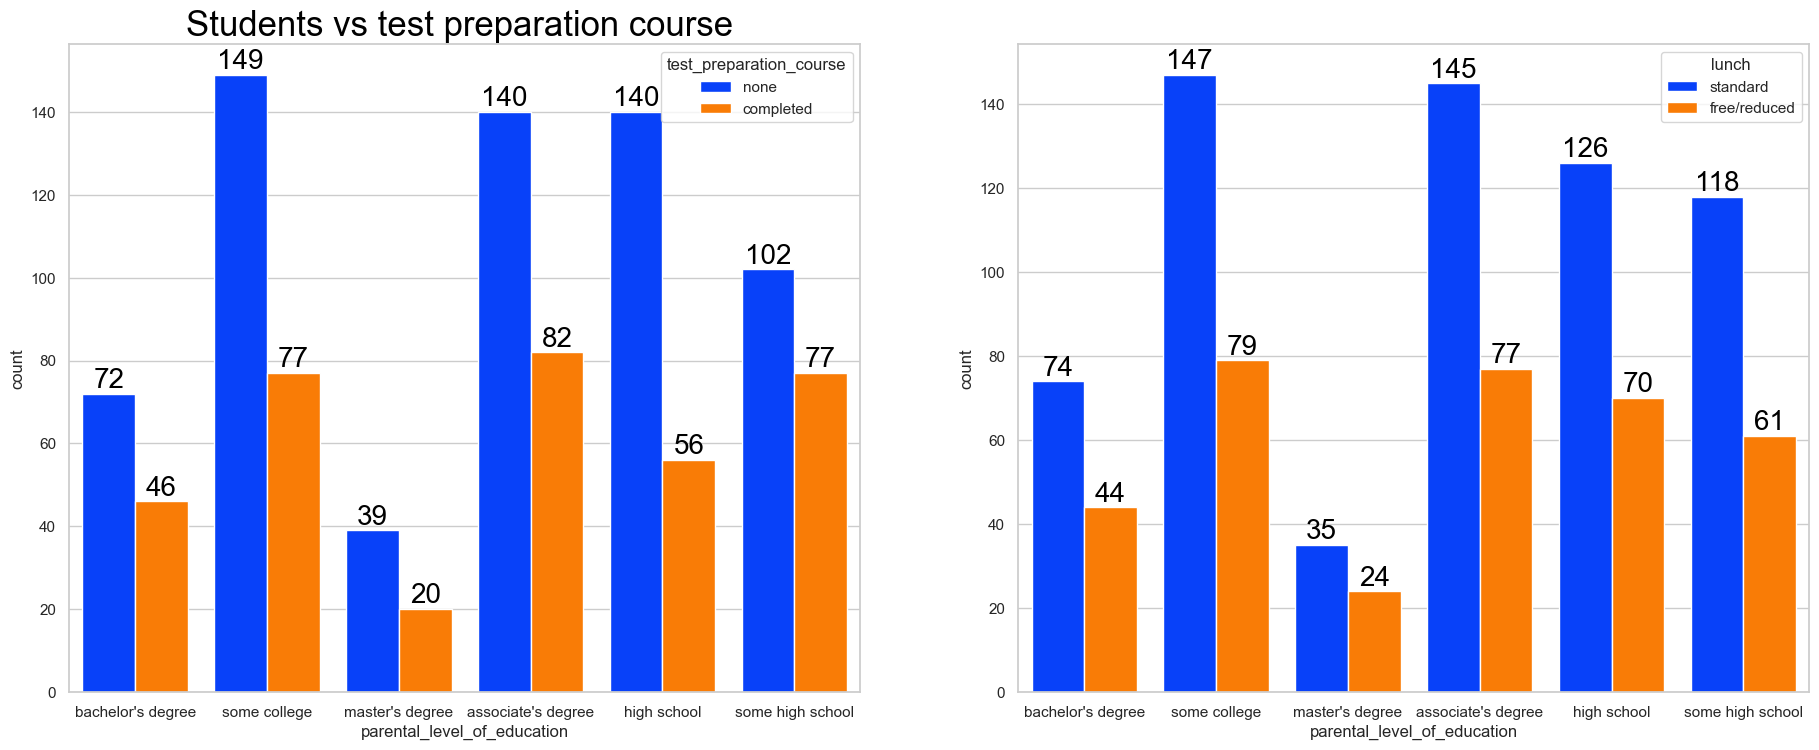

In [43]:
#  BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )
f,ax = plt.subplots(1,2,figsize=(20,8))

sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course ', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)


<Axes: xlabel='lunch', ylabel='writing_score'>

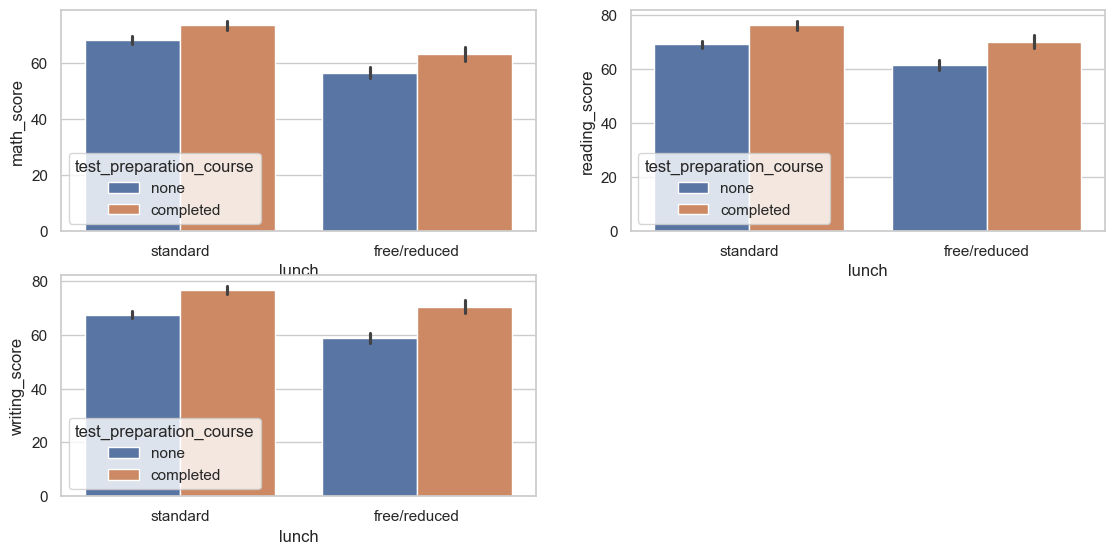

In [44]:
#BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)
plt.subplot(2,2,2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)
plt.subplot(2,2,3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)


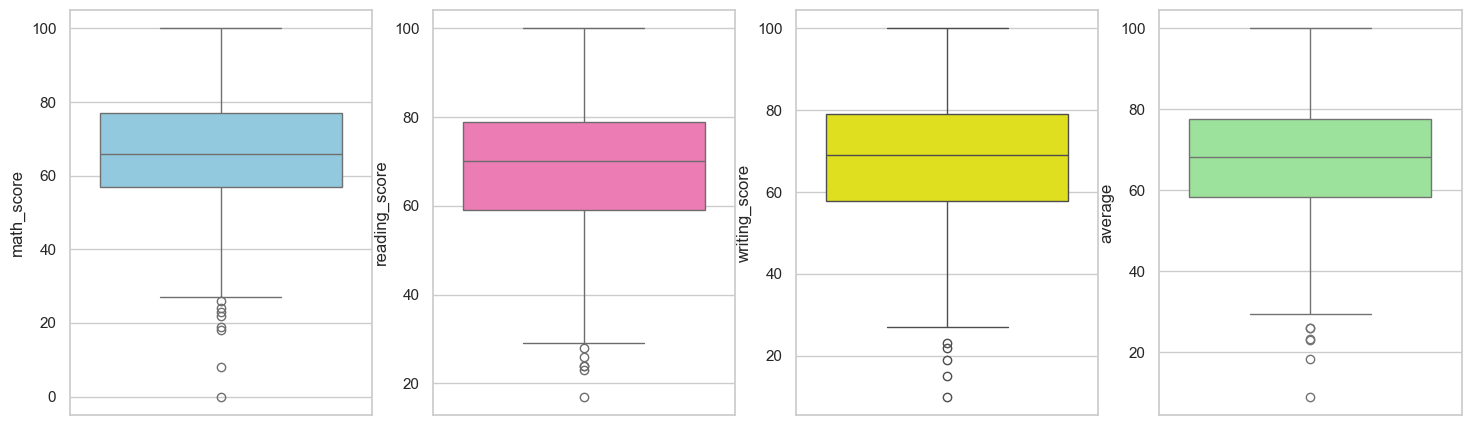

In [45]:
#Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#CHECKING OUTLIERS

plt.figure(figsize=(16,5))

plt.subplot(141)
sns.boxplot(y='math_score', data=df, color='skyblue')

plt.subplot(142)
sns.boxplot(y='reading_score', data=df, color='hotpink')

plt.subplot(143)
sns.boxplot(y='writing_score', data=df, color='yellow')

plt.subplot(144)
sns.boxplot(y='average', data=df, color='lightgreen')

plt.show()

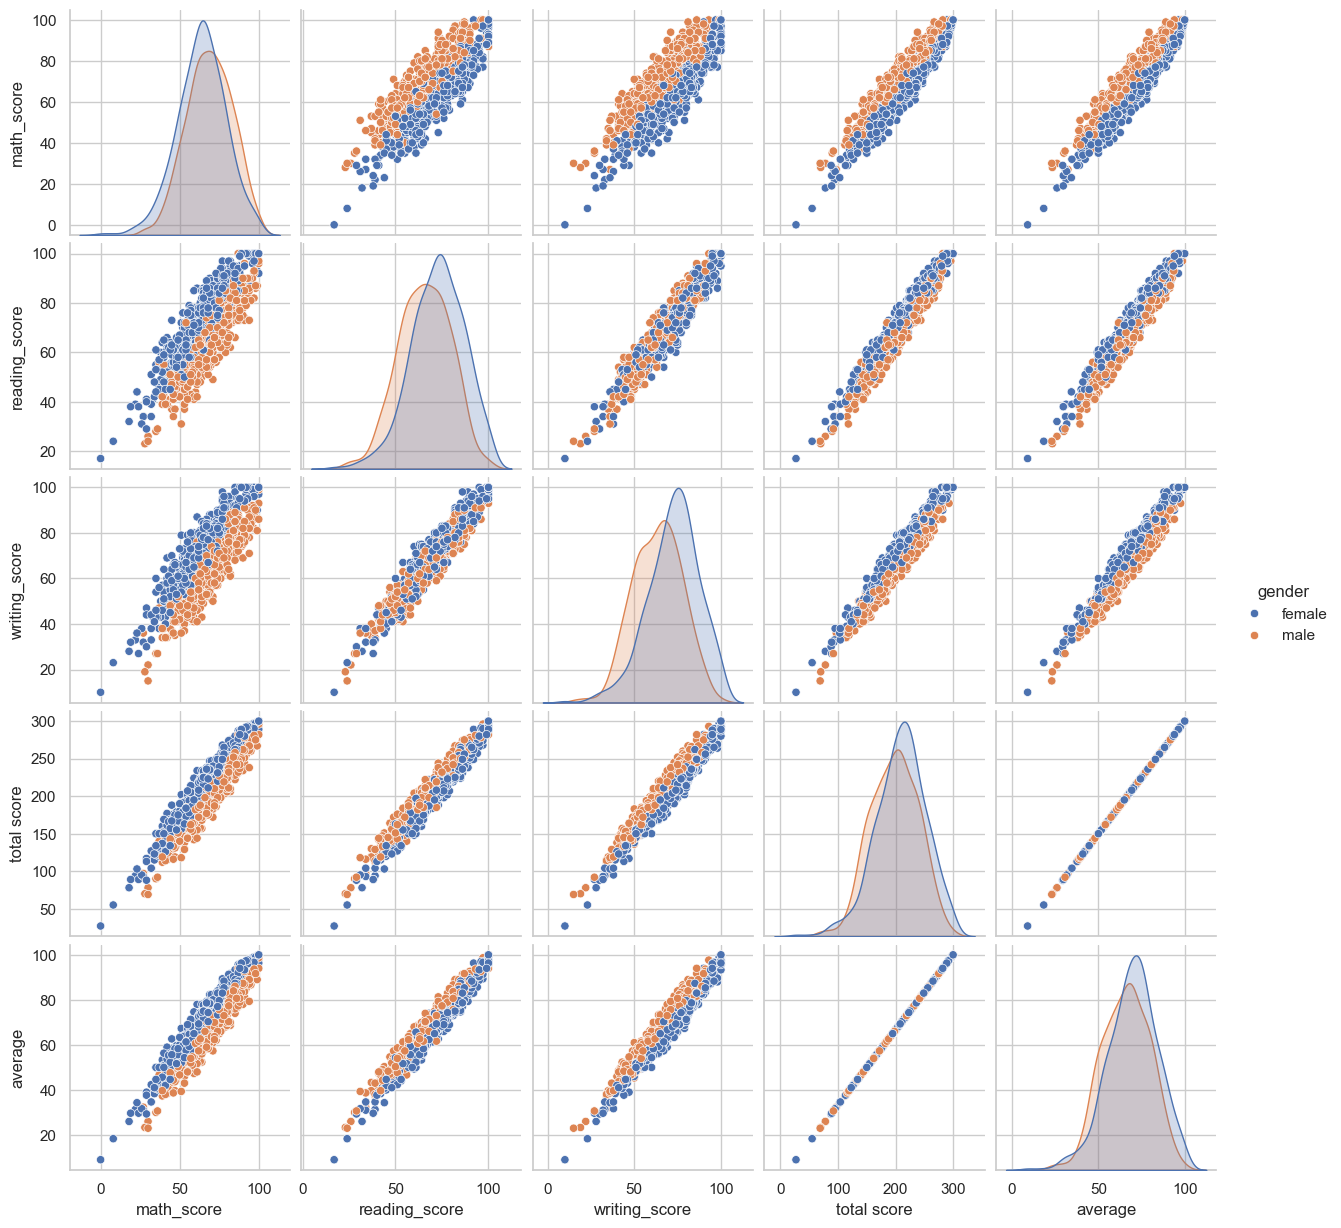

In [46]:
#MUTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(df,hue = 'gender')
plt.show()